## Imports

In [1]:
%matplotlib inline

import timeit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix

# Functions to play animations
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

# Circuit functions and gate definitions
import qctools
from gateset import *

## Testing qctools

In [2]:
testmat = csc_matrix(np.arange(8*8).reshape(32,2))
q = qctools.CircuitTools(testmat)
q.pTrace([1])

testmat = csc_matrix(np.arange(7*7).reshape(7,7))
q = qctools.CircuitTools(testmat)
q.pTrace([1])

testmat = csc_matrix(np.arange(8*8).reshape(8,8))
q = qctools.CircuitTools(testmat)
q.pTrace([5])

Error: non-square matrix
Error: matrix size not 2^k
Error: index not in (1, nqubit)


In [3]:
testmat = csc_matrix(np.arange(8*8).reshape(8,8))
q = qctools.CircuitTools(testmat)
q.prettymatrix()

q.pTrace([1,2]).todense()
q.pTrace([1,3]).todense()
q.pTrace([2,3]).todense()

,0,1,2,3,4,5,6,7
0,0,1,2,3,4,5,6,7
1,8,9,10,11,12,13,14,15
2,16,17,18,19,20,21,22,23
3,24,25,26,27,28,29,30,31
4,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47
6,48,49,50,51,52,53,54,55
7,56,57,58,59,60,61,62,63


matrix([[108.+0.j, 112.+0.j],
        [140.+0.j, 144.+0.j]])

matrix([[ 90.+0.j,  98.+0.j],
        [154.+0.j, 162.+0.j]])

matrix([[ 54.+0.j,  70.+0.j],
        [182.+0.j, 198.+0.j]])

In [4]:
init_state = prod(q0, q1, q0)

qc = qdot(prod(X, S, X),
          prod(H, H, H),
          ctrl(C, X, X),
          ctrl(H, H, C))

q = qctools.CircuitTools(qc)

final_state = q.evolve_state(init_state)

q.prettymatrix()
q.prettystate(init_state).transpose()
q.prettystate(final_state).transpose()

q.prettyqubit(final_state)
q.prettyqubit(init_state)

,0,1,2,3,4,5,6,7
0,-0.707,(0.354+0j),0j,(0.354+0j),0.000,(0.354+0j),0j,(0.354+0j)
1,0.000,(0.354+0j),0j,(0.354+0j),0.707,(-0.354+0j),0j,(-0.354+0j)
2,0.000,-0.354j,0j,0.354j,0.000,0.354j,0.707j,-0.354j
3,0.000,-0.354j,-0.707j,0.354j,0.000,-0.354j,0j,0.354j
4,0.000,(0.354+0j),0j,(0.354+0j),-0.707,(-0.354+0j),0j,(-0.354+0j)
5,0.707,(0.354+0j),0j,(0.354+0j),0.000,(0.354+0j),0j,(0.354+0j)
6,0.000,-0.354j,0.707j,0.354j,0.000,-0.354j,0j,0.354j
7,0.000,-0.354j,0j,0.354j,0.000,0.354j,-0.707j,-0.354j


,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0


,0,1,2,3,4,5,6,7
0,0j,0j,0j,-0.707j,0j,0j,0.707j,0j


-0.707*I*011 + 0.707*I*110

1.0*010

In [5]:
q.check_recover(init_state)
q.check_recover(final_state)

qubit 1 = logical zero
qubit 1 = not factorizable


## Testing gateset

In [6]:
q = qctools.CircuitTools(Chi2)
q.prettymatrix()

q = qctools.CircuitTools(fSWAP)
q.prettymatrix()

q = qctools.CircuitTools(R2(np.pi/4))
q.prettymatrix()

q = qctools.CircuitTools(Fou2(np.pi/2))
q.prettymatrix()

q = qctools.CircuitTools(Bog2(np.pi))
q.prettymatrix()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,-1.0,0.0
3,0.0,0.0,0.0,-1.0


,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,-1.0


,0,1,2,3
0,1.0,0.0,0j,0j
1,0.0,1.0,0j,0j
2,0.0,0.0,(0.707+0.707j),0j
3,0.0,0.0,0j,(0.707+0.707j)


,0,1,2,3
0,1.0,0.000,0j,0j
1,0.0,0.707,0.707j,0j
2,0.0,0.707,(-0-0.707j),0j
3,0.0,0.000,0j,(-0-1j)


,0,1,2,3
0,-1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,-1.0


In [7]:
q = qctools.CircuitTools(FLIP4)
q.prettymatrix()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Testing circuitgrad

In [8]:
from circuitgrad import *

In [9]:
Id12 = prod(I, I, I, I, I, I)

Hl = [prod(X, X, I, I, I, I),
      prod(I, I, X, X, I, I),
      prod(I, I, I, I, X, X),
      prod(X, X, X, X, I, I),
      prod(I, I, X, X, X, X)]

Hm = [prod(Z, I, I, I, I, I),
      prod(I, Z, I, I, I, I),
      prod(I, I, Z, I, I, I),
      prod(I, I, I, Z, I, I),
      prod(I, I, I, I, Z, I)]

w, m, beta = 1.0, 0.0, 1.0

Hfull = w*reduce(np.add, Hl) + m*reduce(np.add, Hm)

Utruth = qexp(Hfull, beta)

In [10]:
cinitR = np.random.uniform(-1.0, 1.0, len(Hl)+1)
cinitI = np.random.uniform(-1.0, 1.0, len(Hl)+1)
cinit = cinitR.astype(complex)
for i in range(len(cinitR)):
    cinit[i] = np.add(cinit[i], 1j*cinitI[i])

In [11]:
cspec = cinit
Uguess = specsum(cspec, Id12, Hl)

cspec
Utruth.shape
Uguess.shape

array([ 0.27339641-0.98947067j, -0.24478052+0.20996695j,
       -0.01599523+0.87479567j, -0.73489693+0.89070843j,
        0.51784854+0.91066625j, -0.54145439-0.1989635j ])

(64, 64)

(64, 64)

In [12]:
for it in range(100):
    cspec = update_spec(Utruth, cspec, Id12, Hl)
    Uguess = specsum(cspec, Id12, Hl)
    
    lossval = loss_func(Utruth, Uguess)
    
    if it%5 ==0:
        print('epoch / loss:', it, '/', lossval)

epoch / loss: 0 / 20.72184491739001
epoch / loss: 5 / 20.413963535567497
epoch / loss: 10 / 20.10645280608364
epoch / loss: 15 / 19.79932950997874
epoch / loss: 20 / 19.49261142496929
epoch / loss: 25 / 19.186317397915193
epoch / loss: 30 / 18.88046742343539
epoch / loss: 35 / 18.575082729256206
epoch / loss: 40 / 18.27018586893696
epoch / loss: 45 / 17.965800822683764
epoch / loss: 50 / 17.66195310703452
epoch / loss: 55 / 17.358669894279036
epoch / loss: 60 / 17.055980142565197
epoch / loss: 65 / 16.7539147377399
epoch / loss: 70 / 16.45250664807825
epoch / loss: 75 / 16.151791093170306
epoch / loss: 80 / 15.85180572835914
epoch / loss: 85 / 15.552590846260275
epoch / loss: 90 / 15.25418959703677
epoch / loss: 95 / 14.956648229259565


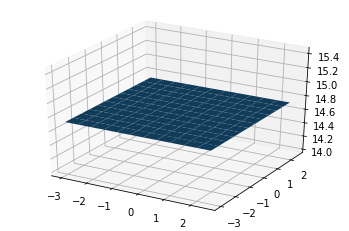

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.5)
tX, tY = np.meshgrid(x, y)
tfunc = np.array([loss_func(Uguess, Utruth) for x,y in zip(np.ravel(tX), np.ravel(tY))])

tZfunc = tfunc.reshape(tX.shape)

ax.plot_surface(tX, tY, tZfunc)
plt.show()